In [3]:
%load_ext IPython.extensions.autoreload
%autoreload 2

In [4]:
import sys
from pathlib import Path

def find_src_folder(current_path: Path, folder_name: str = 'src') -> Path:
    search_directories = [current_path] + list(current_path.parents)
    for parent in search_directories:
        if parent.name == folder_name:
            return parent.parent
    return current_path

src_path = find_src_folder(Path.cwd(), 'src')
sys.path.append(str(src_path))

# Análisis exploratorio (EDA)
Dada la información extraída y almacenada en formato .parquet, se realiza un análisis exploratorio sobre la información recolectada

## Importación de librerias necesarias

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

import pandas as pd

from matplotlib.ticker import FuncFormatter

import tensorflow_hub as hub

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from src.utils import SparkUtils

from pyspark.sql import functions as F, types as T, DataFrame

In [47]:
from src.utils.visualization import plot_percentage_matrix_focus_category
from src.utils.dataframe import check_null_values, check_empty_arrays

In [6]:
spark_utils = SparkUtils('quality')

In [7]:
spark = spark_utils.spark

## Análisis información de productos

Cargar información de items

In [8]:
meta_items = spark.read.parquet(spark_utils.path('meta_items'))

Vista general de columnas disponibles

In [13]:
" | ".join( meta_items.columns )

'title | main_category | features | description | average_rating | rating_number | price | store | parent_asin | categories | details | images'

Examinación de valores nulos en columnas

In [54]:
columns_data_nulls = []

for col in meta_items.columns:
    null_count, non_null_count, _ = check_null_values( meta_items, col)
    columns_data_nulls.append( (non_null_count, null_count, col) )
    print(
        f"""
        Columna: {col}
        Nulls: {null_count}
        Non-Null: {non_null_count}
        """
    )


        Columna: title
        Nulls: 0
        Non-Null: 7854088
        

        Columna: main_category
        Nulls: 155672
        Non-Null: 7698416
        

        Columna: features
        Nulls: 0
        Non-Null: 7854088
        

        Columna: description
        Nulls: 0
        Non-Null: 7854088
        

        Columna: average_rating
        Nulls: 2200
        Non-Null: 7851888
        

        Columna: rating_number
        Nulls: 260392
        Non-Null: 7593696
        

        Columna: price
        Nulls: 1607408
        Non-Null: 6246680
        

        Columna: store
        Nulls: 18744
        Non-Null: 7835344
        

        Columna: parent_asin
        Nulls: 0
        Non-Null: 7854088
        

        Columna: categories
        Nulls: 0
        Non-Null: 7854088
        

        Columna: details
        Nulls: 0
        Non-Null: 7854088
        

        Columna: images
        Nulls: 0
        Non-Null: 7854088
        


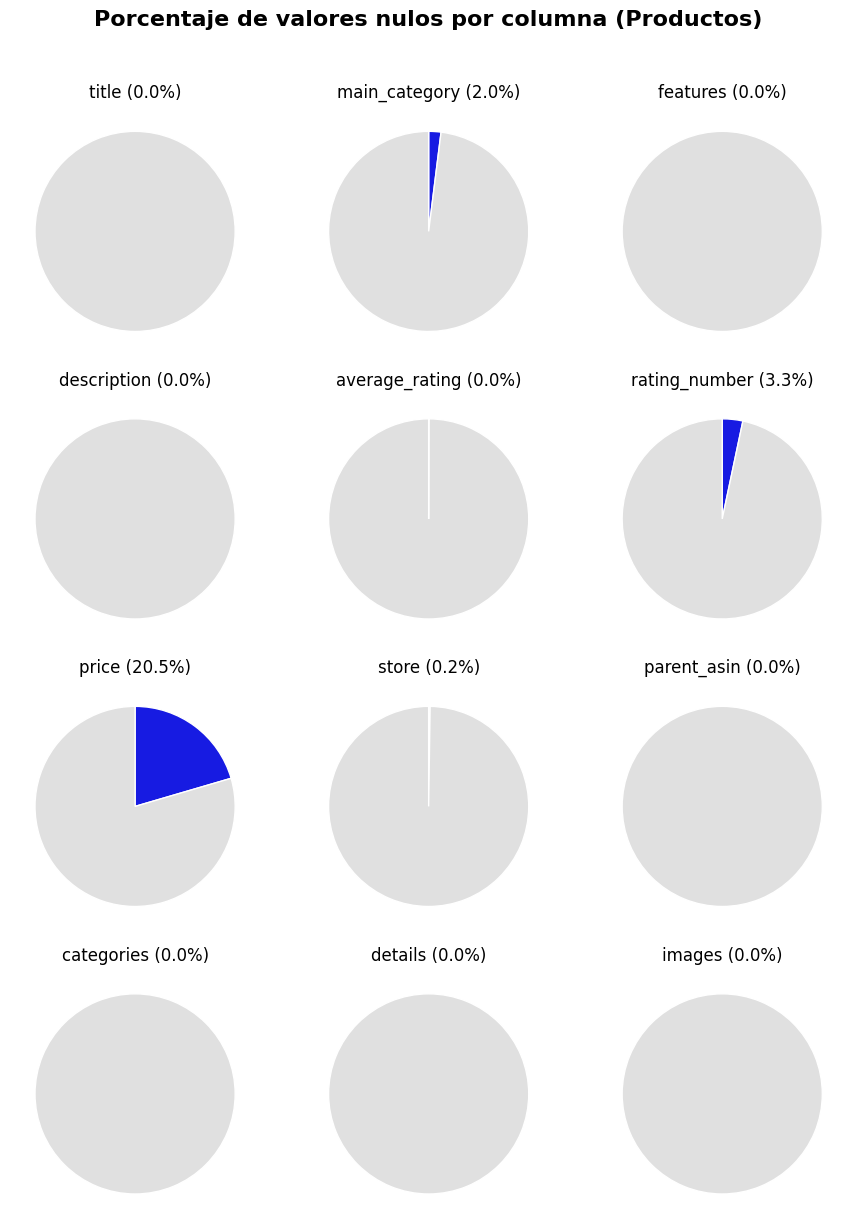

In [55]:
plot_percentage_matrix_focus_category(
    columns_data_nulls,
    title = "Porcentaje de valores nulos por columna (Productos)",
    target_index = 1, label_index = 2,
    target_color = "#171BE2"
)

Examinación de tamaños de arreglo para campos que se encuentran en formato de arreglo

In [56]:
columns_data_empty = []

for col in [
    "features", "description", "categories", "images"
]:
    empty_count, non_empty_count, _ = check_empty_arrays( meta_items, col)
    columns_data_empty.append( (non_empty_count, empty_count, col) )
    print(
        f"""
        Columna: {col}
        Empties: {empty_count}
        Non-Empties: {non_empty_count}
        """
    )


        Columna: features
        Empties: 481800
        Non-Empties: 7372288
        

        Columna: description
        Empties: 363000
        Non-Empties: 7491088
        

        Columna: categories
        Empties: 6200480
        Non-Empties: 1653608
        

        Columna: images
        Empties: 352
        Non-Empties: 7853736
        


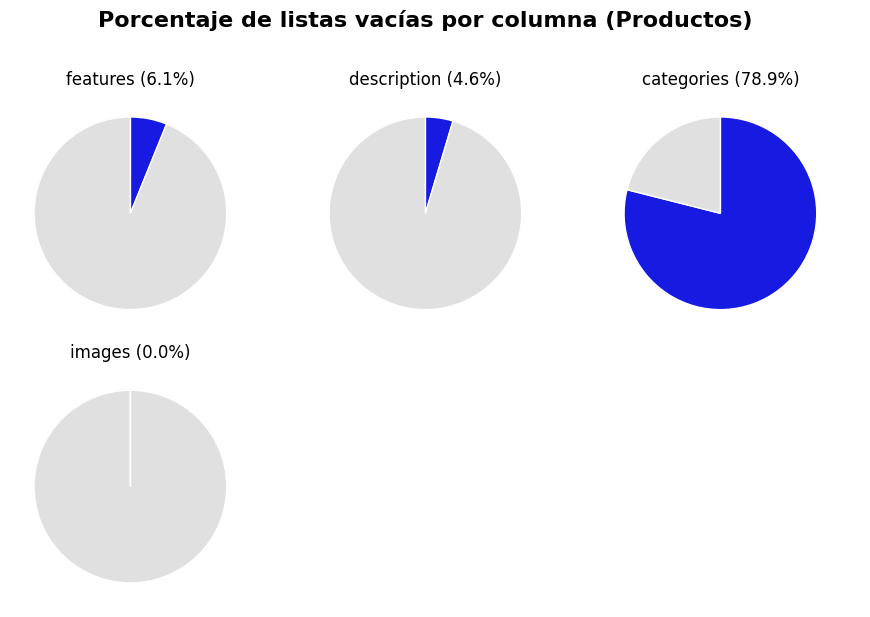

In [58]:
plot_percentage_matrix_focus_category(
    columns_data_empty,
    title = "Porcentaje de listas vacías por columna (Productos)",
    target_index = 1, label_index = 2,
    target_color = "#171BE2"
)

## Análisis información de reseñas

Cargar información de items

In [61]:
reviews = spark.read.parquet(spark_utils.path('reviews'))

Vista general de columnas disponibles

In [62]:
" | ".join( reviews.columns )

'rating | title | text | timestamp | helpful_vote | parent_asin | images'

Examinación de valores nulos en columnas

In [63]:
columns_data_nulls_reviews = []

for col in reviews.columns:
    null_count, non_null_count, _ = check_null_values( reviews, col)
    columns_data_nulls_reviews.append( (non_null_count, null_count, col) )
    print(
        f"""
        Columna: {col}
        Nulls: {null_count}
        Non-Null: {non_null_count}
        """
    )


        Columna: rating
        Nulls: 0
        Non-Null: 222614055
        

        Columna: title
        Nulls: 0
        Non-Null: 222614055
        

        Columna: text
        Nulls: 0
        Non-Null: 222614055
        

        Columna: timestamp
        Nulls: 0
        Non-Null: 222614055
        

        Columna: helpful_vote
        Nulls: 0
        Non-Null: 222614055
        

        Columna: parent_asin
        Nulls: 0
        Non-Null: 222614055
        

        Columna: images
        Nulls: 0
        Non-Null: 222614055
        


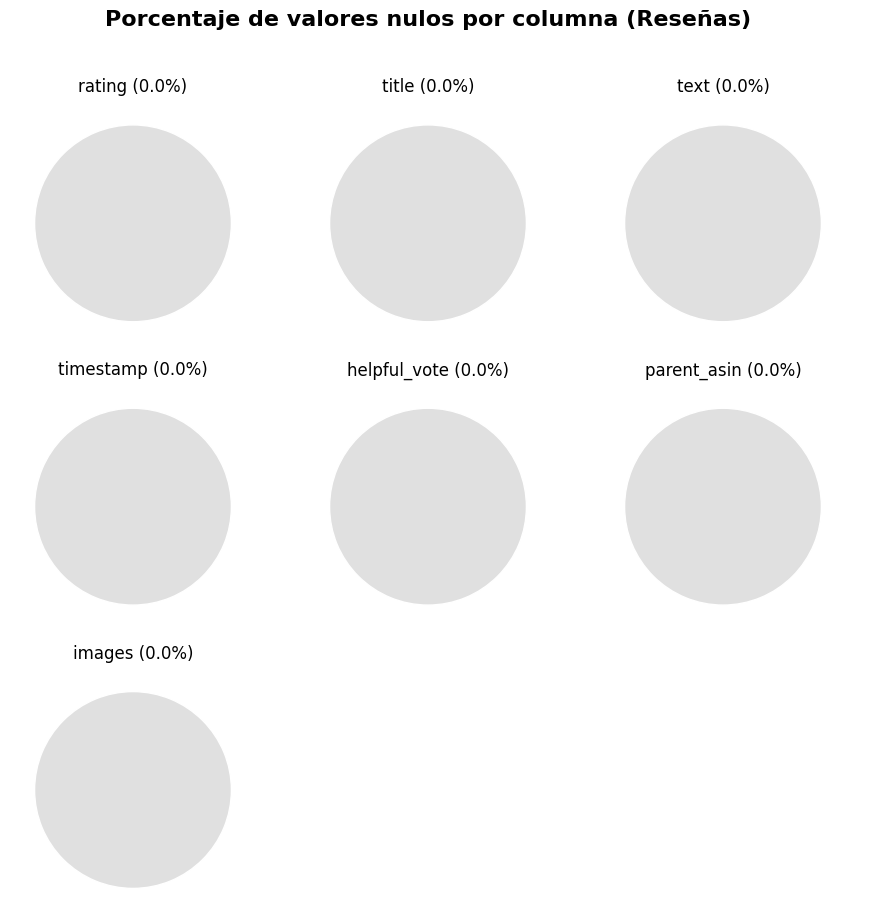

In [64]:
plot_percentage_matrix_focus_category(
    columns_data_nulls_reviews,
    title = "Porcentaje de valores nulos por columna (Reseñas)",
    target_index = 1, label_index = 2,
    target_color = "#171BE2"
)

In [68]:
columns_data_empty_reviews = []

for col in [
    "images"
]:
    empty_count, non_empty_count, _ = check_empty_arrays( reviews, col)
    columns_data_empty_reviews.append( (non_empty_count, empty_count, col) )
    print(
        f"""
        Columna: {col}
        Empties: {empty_count}
        Non-Empties: {non_empty_count}
        """
    )


        Columna: images
        Empties: 212782329
        Non-Empties: 9831726
        


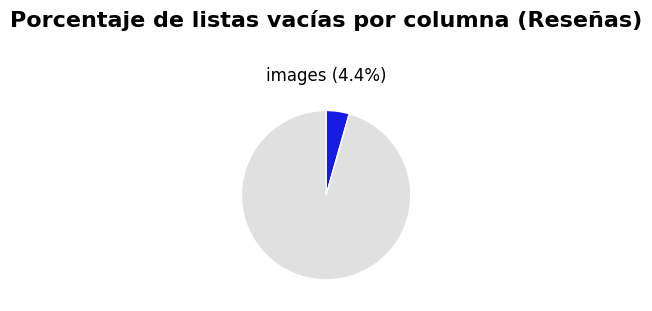

In [71]:
plot_percentage_matrix_focus_category(
    columns_data_empty_reviews,
    title = "Porcentaje de listas vacías por columna (Reseñas)",
    target_index = 0, label_index = 2,
    target_color = "#171BE2"
)